# Mnist 분류기 구현

In [3]:
# !pip install torchvision

In [4]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import matplotlib.pyplot as plt
import random

In [7]:
use_cuda = torch.cuda.is_available()
# use_cuda
device = torch.device('cuda' if use_cuda else 'cpu')
print(f'learn with {device}')

learn with cpu


In [8]:
random.seed(0)
torch.manual_seed(0)
if device == 'cuda' :
    torch.cuda.manual_seed_all(0)

In [9]:
epochs = 15
batch_size = 100

In [14]:
mnist_train = dsets.MNIST(root='MNIST_data/',
                         train=True,
                         transform=transforms.ToTensor(),
                         download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False, # test dataset
                         transform=transforms.ToTensor(), # pytorch tensor로 변환
                         download=True)

In [11]:
data_loader = DataLoader(dataset=mnist_train,
                        batch_size= batch_size,
                        shuffle=True,
                        drop_last=True)

linear = nn.Linear(784, 10, bias = True).to(device) # 28 * 28 pixel

In [12]:
# 비용함수, 옵티마이저 정의
criterion = nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.SGD(linear.parameters(), lr = 0.1)

In [13]:
for epoch in range(epochs) :
    avg_cost = 0
    total_batch = len(data_loader)
    
    for x, y in data_loader :
        x = x.view(-1, 28*28).to(device) # x : Tensor(100, 784)
        y = y.to(device)
        
        optimizer.zero_grad()
        h = linear(x)
        cost = criterion(h, y)
        cost.backward()
        optimizer.step()
        
        avg_cost += cost / total_batch

        
    print('Epoch:', '%04d' % (epoch + 1), 'cost:', '{:.9f}'.format(avg_cost))
        
        
print('Learning Finished !')
        

Epoch: 0001 cost = 0.939314187
Epoch: 0002 cost = 0.506753147
Epoch: 0003 cost = 0.429474860
Epoch: 0004 cost = 0.390125722
Epoch: 0005 cost = 0.365837693
Epoch: 0006 cost = 0.347538322
Epoch: 0007 cost = 0.334286153
Epoch: 0008 cost = 0.323861003
Epoch: 0009 cost = 0.314717114
Epoch: 0010 cost = 0.307282984
Epoch: 0011 cost = 0.300728649
Epoch: 0012 cost = 0.295169324
Epoch: 0013 cost = 0.289617449
Epoch: 0014 cost = 0.284914643
Epoch: 0015 cost = 0.281037569
Learning Finished !


Accuracy : 0.9190999865531921
label : 1
Pred : 1


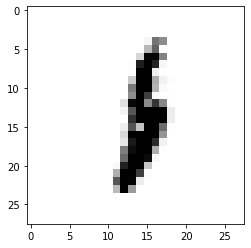

In [20]:
with torch.no_grad() : # no_grad() : gradient 계산 수행 X
    X_test = mnist_test.test_data.view(-1, 28*28).float().to(device)
    y_test = mnist_test.test_labels.to(device)
    
    pred = linear(X_test)
    corr_pred = torch.argmax(pred, 1) == y_test
    acc = corr_pred.float().mean()
    print(f'Accuracy : {acc.item()}')
    
    # testset 무작위 예측
    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.test_data[r:r+1].view(-1, 28*28).float().to(device)
    y_single_data = mnist_test.test_labels[r:r+1].to(device)
    
    print('label :', y_single_data.item())
    single_pred = linear(X_single_data)
    print('Pred :', torch.argmax(single_pred, 1).item())
    
    plt.imshow(mnist_test.test_data[r:r+1].view(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()
    
    